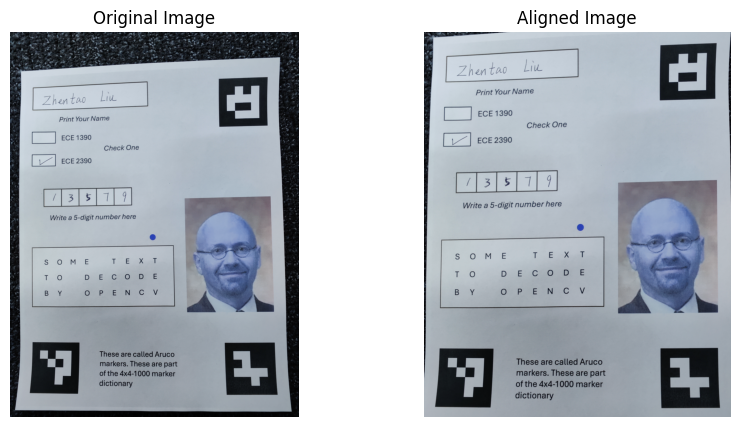

In [7]:
import cv2
import matplotlib.pyplot as plt
import cv2.aruco as aruco
import numpy as np

# alignment
image = cv2.imread('/ihome/yufeihuang/zhl169/timothy/ece2390/homework/tmp_hw8/Image_20241202143456.jpg')
img_original = cv2.imread('/ihome/yufeihuang/zhl169/timothy/ece2390/homework/tmp_hw8/Homework8.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_orignal = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)


# Define ArUco dictionary
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_4X4_1000)
parameters = aruco.DetectorParameters()

# Detect markers in the image
detector = aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, _ = detector.detectMarkers(gray)
corners_orignal, ids_orignal, _ = detector.detectMarkers(gray_orignal)

src_pts = [corner[0][0] for corner in corners[:3]]
dst_pts = [corner2[0][0] for corner2 in corners_orignal[:3]]

matrix = cv2.getAffineTransform(np.float32(src_pts), np.float32(dst_pts))
aligned_image = cv2.warpAffine(image, matrix, (img_original.shape[1], img_original.shape[0]))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('Original Image')

axes[1].imshow(aligned_image)
axes[1].axis('off')
axes[1].set_title('Aligned Image')

plt.show()


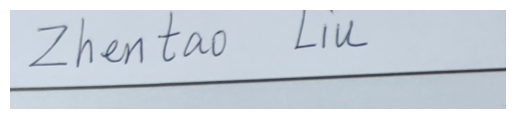

OCR Results for TEXT BOX:
Detected text: 'Zhen tno' with confidence: 0.5015212942730491
Detected text: 'Liu' with confidence: 0.8793960277965367


In [9]:
# what's my name
import easyocr
dpi = 300
cm_to_pixel = dpi / 2.54

def crop_region(image, box_width_cm, box_height_cm, box_x_cm, box_y_cm, cm_to_pixel):
    image_width_px = image.shape[1]
    image_height_px = image.shape[0]
    image_center_x = image_width_px // 2
    image_center_y = image_height_px // 2

    box_width_px = int(box_width_cm * cm_to_pixel)
    box_height_px = int(box_height_cm * cm_to_pixel)
    box_x_px = int(box_x_cm * cm_to_pixel + image_center_x)
    box_y_px = int(box_y_cm * cm_to_pixel + image_center_y)

    box_roi = image[box_y_px:box_y_px + box_height_px, box_x_px:box_x_px + box_width_px]
    return box_roi

text_box_roi = crop_region(aligned_image, 10, 2, -10, -13, cm_to_pixel)
plt.imshow(text_box_roi)
plt.axis('off')
plt.show()

reader = easyocr.Reader(['en'])
result = reader.readtext(text_box_roi)

print("OCR Results for TEXT BOX:")
for detection in result:
    text = detection[1]
    confidence = detection[2]
    print(f"Detected text: '{text}' with confidence: {confidence}")

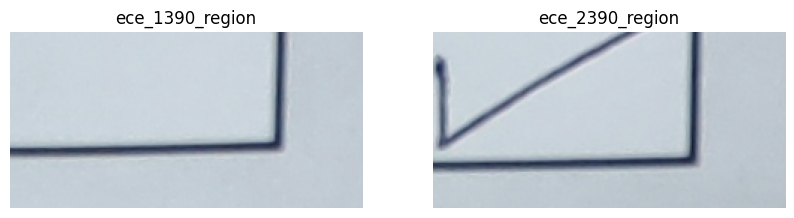

ECE-2390


In [10]:
# which box is checked
ece_1390_region = crop_region(aligned_image, 2, 1, -10, -9, cm_to_pixel)
ece_2390_region = crop_region(aligned_image, 2, 1, -10, -7, cm_to_pixel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(ece_1390_region)
axes[0].axis('off')
axes[0].set_title('ece_1390_region')

axes[1].imshow(ece_2390_region)
axes[1].axis('off')
axes[1].set_title('ece_2390_region')

plt.show()

int_1390 = np.mean(ece_1390_region)
int_2390 = np.mean(ece_2390_region)
print("ECE-1390" if int_1390 < int_2390 else "ECE-2390")

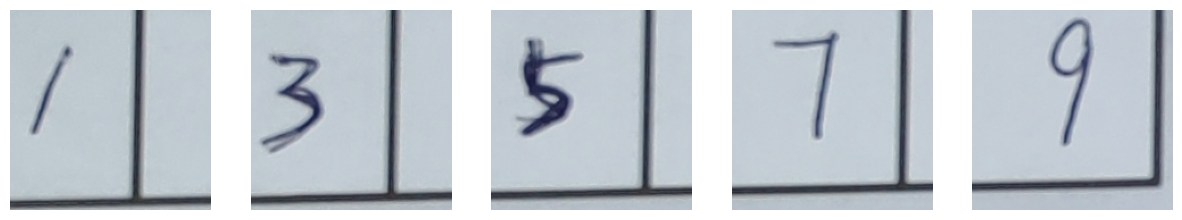

digit is 
digit is 30
digit is 5
digit is 1
digit is 7
it's probably because of my terrible handwriting, the OCR doesn't work well


In [ ]:
# decode the 5 numbers
# crop the digits
dig_1 = crop_region(aligned_image, 1.5, 1.5, -9, -4, cm_to_pixel)
dig_2 = crop_region(aligned_image, 1.5, 1.5, -7.5, -4, cm_to_pixel)
dig_3 = crop_region(aligned_image, 1.5, 1.5, -6, -4, cm_to_pixel)
dig_4 = crop_region(aligned_image, 1.5, 1.5, -4.5, -4, cm_to_pixel)
dig_5 = crop_region(aligned_image, 1.5, 1.5, -3, -4, cm_to_pixel)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(dig_1)
axes[0].axis('off')
axes[1].imshow(dig_2)
axes[1].axis('off')
axes[2].imshow(dig_3)
axes[2].axis('off')
axes[3].imshow(dig_4)
axes[3].axis('off')
axes[4].imshow(dig_5)
axes[4].axis('off')
plt.show()

import pytesseract
pytesseract.pytesseract.tesseract_cmd = "/ihome/yufeihuang/zhl169/tesseract/bin/tesseract"
five_digits = [dig_1, dig_2, dig_3, dig_4, dig_5]
for digit in five_digits:
    _, binary_digit = cv2.threshold(digit, 128, 255, cv2.THRESH_BINARY)
    config = "--psm 10 -c tessedit_char_whitelist=0123456789"
    digit_text = pytesseract.image_to_string(binary_digit, config=config).strip()
    print(f'digit is {digit_text}')

print("it's probably because of my terrible handwriting and misalignment, the OCR doesn't work well")

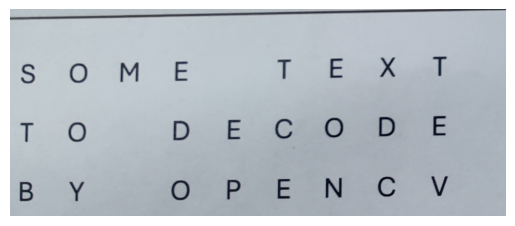

decoded text:ee ——————————————————————————————
S OM E T E X T
T O D E C O D E
B Y O P ENC V



In [17]:
# read the printed text box
text_region = crop_region(aligned_image, 12, 5, -10, 1, cm_to_pixel)
plt.imshow(text_region)
plt.axis('off')
plt.show()

gray_text_region = cv2.cvtColor(text_region, cv2.COLOR_BGR2GRAY)

_, binary_text_region = cv2.threshold(gray_text_region, 128, 255, cv2.THRESH_BINARY)

config = "--psm 6"
decoded_text = pytesseract.image_to_string(binary_text_region, config=config)
print(f'decoded text:{decoded_text}')

I0000 00:00:1733200159.739038   41215 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1733200159.780731   42263 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.54.15), renderer: NVIDIA L40S/PCIe/SSE2


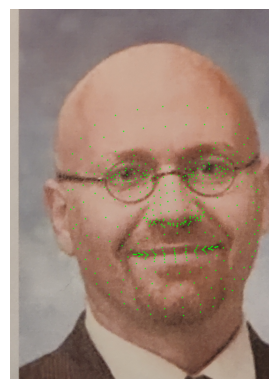

In [19]:
#  Dr Huppert's face recognition
import mediapipe as mp

face_region = crop_region(aligned_image, 7, 10, 3, -3, cm_to_pixel)
plt.imshow(face_region)

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True)

face_region = cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB)
results = face_mesh.process(face_region)

if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        for id, landmark in enumerate(face_landmarks.landmark):
            h, w, _ = face_region.shape
            x, y = int(landmark.x * w), int(landmark.y * h)
            cv2.circle(face_region, (x, y), 2, (0, 255, 0), -1)

plt.imshow(face_region)
plt.axis('off')
plt.show()